In [289]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import json
import csv
import os
import time


%matplotlib inline 

import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 50)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [239]:
InteractiveShell.ast_node_interactivity = "last_expr"

## Data Retrieval

In [233]:
person_ids = {}
player_bios = []

def get_player_bio(person_id):
    
    if person_id in person_ids:
        
        continue
        
    else:

        url = 'https://stats.nba.com/player/' + str(person_id) + '/career/'
        req = requests.get(url)
        soup = BeautifulSoup(req.content)
        player_info = soup.find(text=re.compile('window.nbaStatsPlayerStats'));
        attributes = player_info[player_info.index('{') + 1:player_info.index('}')].split(',"')

        player_bio = {}

        for attribute in attributes:
            key = attribute.split(':')[0].replace('"', '')
            value = attribute.split(':')[1].replace('"', '')
            player_bio[key] = value

        player_bios.append(player_bio)

        person_ids[person_id] = True
            
    return

print(player_bios)

now got Kareem Abdul-Jabbar
now got Tyson Chandler
already got this one
[{'PERSON_ID': '76003', 'FIRST_NAME': 'Kareem', 'LAST_NAME': 'Abdul-Jabbar', 'DISPLAY_FIRST_LAST': 'Kareem Abdul-Jabbar', 'DISPLAY_LAST_COMMA_FIRST': 'Abdul-Jabbar, Kareem', 'DISPLAY_FI_LAST': 'K. Abdul-Jabbar', 'PLAYER_SLUG': 'kareem-abdul-jabbar', 'BIRTHDATE': '1947-04-16T00', 'SCHOOL': 'California-Los Angeles', 'COUNTRY': 'USA', 'LAST_AFFILIATION': 'UCLA\\/USA', 'HEIGHT': '7-2', 'WEIGHT': '225', 'SEASON_EXP': '19', 'JERSEY': '33', 'POSITION': 'Center', 'ROSTERSTATUS': 'Inactive', 'TEAM_ID': '1610612747', 'TEAM_NAME': 'Lakers', 'TEAM_ABBREVIATION': 'LAL', 'TEAM_CODE': 'lakers', 'TEAM_CITY': 'Los Angeles', 'PLAYERCODE': 'HISTADD_kareem_abdul-jabbar', 'FROM_YEAR': '1969', 'TO_YEAR': '1988', 'DLEAGUE_FLAG': 'N', 'NBA_FLAG': 'Y', 'GAMES_PLAYED_FLAG': 'Y', 'DRAFT_YEAR': '1969', 'DRAFT_ROUND': '1', 'DRAFT_NUMBER': '1', 'POSITION_INITIALS': 'C', 'AGE': '73', 'AGE_DAYS': '104'}, {'PERSON_ID': '2199', 'FIRST_NAME': 'Tyson

In [254]:
# Player statistics by season
if not os.path.isdir('./player_data'):
    
    os.makedirs('./player_data', exist_ok=True)
    
    person_ids = {} # will contain person_id for every player in history
    
    # Iterate through seasons.
    for i in range (1946, 2020):

        print ('Working on {}'.format(i))
        
        #no data for these years
        if i in [1946, 1947, 1948, 1949, 1950]:
            continue

        time.sleep(3)

        # Get URL
        url_year_part = str(i) + '-' + str(i + 1)[-2:]
        url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=' + url_year_part + '&SeasonType=Regular+Season&StatCategory=MIN'

        headers = {
            'referrer': 'https://google.com',
            'Accept': 'application/json, text/plain, */*',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
            'Connection': 'keep-alive',
            'DNT': '1',
            'Host': 'stats.nba.com',
            'Referer': 'https://stats.nba.com/leaders/?Season=1950-51&SeasonType=Regular%20Season&StatCategory=MIN',
            'Sec-Fetch-Dest': 'empty',
            'Sec-Fetch-Mode': 'cors',
            'Sec-Fetch-Site': 'same-origin',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
            'x-nba-stats-origin': 'stats',
            'x-nba-stats-token': 'true',
            'X-NewRelic-ID': 'VQECWF5UChAHUlNTBwgBVw=='
            }

        req = requests.get(url, headers=headers)
        stat_dict = json.loads(req.content)
        
        csv_path = 'player_data/' + url_year_part + '.csv'
        csv_columns = stat_dict['resultSet']['headers']
        player_rows = stat_dict['resultSet']['rowSet']
        
        with open(csv_path, 'w') as csvfile:
            
            writer = csv.writer(csvfile)
            writer.writerow(csv_columns)
            
            for row in player_rows:
                writer.writerow(row)
                person_id = row[0]
                if person_id not in person_ids:
                    person_ids[person_id] = True
        
# Writes all player bio information to CSV
    player_bios = []

    for person_id in person_ids:

            time.sleep(.25)

            url = 'https://stats.nba.com/player/' + str(person_id) + '/career/'
            req = requests.get(url)
            soup = BeautifulSoup(req.content)
            player_info = soup.find(text=re.compile('window.nbaStatsPlayerStats'));
            attributes = player_info[player_info.index('{') + 1:player_info.index('}')].split(',"')

            player_bio = []
            player_bio_headers = []

            for attribute in attributes:
                attribute_name = attribute.split(':')[0].replace('"', '')
                attribute_value = attribute.split(':')[1].replace('"', '')
                
                # header row for player_bios.csv
                if len(player_bios) == 0:
                    player_bio_headers.append(attribute_name)
                
                # height as inches int
                if attribute_name == 'HEIGHT':
                    height_parts = attribute_value.split('-')
                    attribute_value = int(height_parts[0]) * 12 + int(height_parts[1])
                    
                player_bio.append(attribute_value)
'''                    
            # need header row for player_bios
            if len(player_bios) == 0:
                player_bio_headers = []
                for attribute in attributes:
                    attribute_name = attribute.split(':')[0].replace('"', '')
                    player_bio_headers.append(attribute_name)

            for attribute in attributes:
                attribute_value = attribute.split(':')[1].replace('"', '')
                player_bio.append(attribute_value)
'''
            player_bios.append(player_bio)

    csv_path = 'player_bios.csv'
    with open(csv_path, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(player_bio_headers)
        for row in player_bios:
            writer.writerow(row)

## Clustering Runs

In [279]:
InteractiveShell.ast_node_interactivity = "last_expr"

years = [x for x in os.listdir(path='./player_data') if x[-4:] == '.csv']
years.sort()

# initializing K-Means Results list, with header row
results = [['year', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']]

# initializing player statistics
player_stats = [['year', 'PLAYER_ID', 'player', 'GP', 'MIN', 'PTS', 'REB', 'AST']]

#initializing player clusters
player_clusters = [['year', 'PLAYER_ID', 'player', 'n_clusters', 'cluster']]

# initializing centroid statistics
centroid_stats = [['year', 'n_clusters', 'cluster', 'n_players', 'PTS', 'REB', 'AST']]

# year by year
for year in range(1951, 2020):
#for year in range(2019, 2020):    
    
    print('Working on {}...'.format(year))
    
    df = pd.read_csv('./player_data/' + str(year) + '-' + str(year + 1)[-2:] + '.csv')
    df = df[df.MIN >= 25]
    df.insert(0, 'year', year)
        
    cols = ['year', 'PLAYER_ID', 'PLAYER', 'GP', 'MIN']
    k_means_attributes = ['PTS', 'REB', 'AST']
    cols.extend(k_means_attributes)
    
    # Per 36 stats for K-Means attributes
    # Steals, Blocks start in 1973
    per_36 = df.loc[:,cols]
    for attrib in k_means_attributes:
        per_36.loc[:, attrib] = (per_36[attrib] * (36 / per_36['MIN'])).round(1)
    
    # per_36 dataframe to equalize minutes for K-Means. Also storing as separate file
    player_stats.extend(per_36.to_records(index=False).tolist())
    curr_player_clusters = per_36.loc[:,['year', 'PLAYER_ID', 'PLAYER']]
        
    # Checking relationships between pts, reb, ast
    #sns.pairplot(per_36[k_means_attributes])
    
    # Scaling
    scaler = preprocessing.StandardScaler()
    per_36_scaled = scaler.fit_transform(per_36[k_means_attributes])
        
    clusters = list(range(1, 11))
#    clusters = [3, 5]
    inertias = []
    silhouettes = []
    avg_dist_from_centroids = []
    
    for k in clusters:
        
        kmeans = cluster.KMeans(n_clusters=k,
                               init='k-means++', #initializes nodes at greater distance from each other
                               random_state=1)
        kmeans.fit(per_36_scaled)
        
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        inertia = kmeans.inertia_
        #silhouette_score = metrics.silhouette_score(per_36_scaled, labels, metric='euclidean')
        
        # Equalizes inertia metric across different numbers of players in league 
        avg_dist_from_centroid = inertia/len(per_36_scaled)
        
        inertias.append(round(inertia, 1))
        #silhouettes.append(round(silhouette_score, 1))
        avg_dist_from_centroids.append(avg_dist_from_centroid)
            
        curr_player_clusters['n_clusters'] = k
        curr_player_clusters['cluster'] = labels
        player_clusters.extend(curr_player_clusters.to_records(index=False).tolist())
        
        # Players per cluster
        n_players = pd.Series(labels).value_counts().sort_index().tolist()
        
        # Logs unnormalized PTS/REB/AST values for each centroid, so we have frames of reference 
        # for the clusters each player ends up in
        curr_centroid_stats = pd.DataFrame(data=scaler.inverse_transform(centroids),
                                    columns=k_means_attributes).round(1)
        curr_centroid_stats.insert(0, column='year', value=year)
        curr_centroid_stats.insert(1, column='n_clusters', value=k)
        curr_centroid_stats.insert(2, column='label', value=curr_centroid_stats.index)
        curr_centroid_stats.insert(3, column='n_players', value = n_players)
        centroid_stats.extend(curr_centroid_stats.to_records(index=False).tolist()) # maintains data type, no int-->float
    
    #plt.scatter(clusters, inertias)
    #plt.scatter(clusters, silhouettes)
    
    avg_dist_from_centroids.insert(0, year)
    results.append(avg_dist_from_centroids)
        
# results to CSV
csv_path = 'k_means_results.csv'
with open(csv_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for year in results:
        writer.writerow(year)

csv_path = 'player_per_36_stats.csv'
with open(csv_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for player_year in player_stats:
        writer.writerow(player_year)
        
csv_path = 'player_clusters.csv'
with open(csv_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for player_cluster in player_clusters:
        writer.writerow(player_cluster)
        
csv_path = 'centroid_results.csv'
with open(csv_path, 'w') as csvfile:
    writer = csv.writer(csvfile)
    for centroid in centroid_stats:
        writer.writerow(centroid)

Working on 1951...
Working on 1952...
Working on 1953...
Working on 1954...
Working on 1955...
Working on 1956...
Working on 1957...
Working on 1958...
Working on 1959...
Working on 1960...
Working on 1961...
Working on 1962...
Working on 1963...
Working on 1964...
Working on 1965...
Working on 1966...
Working on 1967...
Working on 1968...
Working on 1969...
Working on 1970...
Working on 1971...
Working on 1972...
Working on 1973...
Working on 1974...
Working on 1975...
Working on 1976...
Working on 1977...
Working on 1978...
Working on 1979...
Working on 1980...
Working on 1981...
Working on 1982...
Working on 1983...
Working on 1984...
Working on 1985...
Working on 1986...
Working on 1987...
Working on 1988...
Working on 1989...
Working on 1990...
Working on 1991...
Working on 1992...
Working on 1993...
Working on 1994...
Working on 1995...
Working on 1996...
Working on 1997...
Working on 1998...
Working on 1999...
Working on 2000...
Working on 2001...
Working on 2002...
Working on 2

## Points of Interest

In [281]:
InteractiveShell.ast_node_interactivity = "all"

k_means_results = pd.read_csv('k_means_results.csv')
k_means_results.tail(10)

player_bios = pd.read_csv('player_bios.csv')
player_bios.tail(10)

centroids = pd.read_csv('centroid_results.csv')
centroids.tail(10)

per_36_stats = pd.read_csv('player_per_36_stats.csv')
per_36_stats.tail(10)

player_clusters = pd.read_csv('player_clusters.csv')
player_clusters.tail(10)

,year,one,two,three,four,five,six,seven,eight,nine,ten
59,2010,3.0,1.988510,1.423049,1.024927,0.877172,0.747680,0.639392,0.570399,0.500388,0.455939
60,2011,3.0,1.956316,1.415952,1.070299,0.864525,0.741967,0.664059,0.581981,0.518607,0.438811
61,2012,3.0,1.857991,1.334355,1.058892,0.840027,0.698127,0.631782,0.577656,0.525035,0.480443
62,2013,3.0,2.028908,1.416437,1.134981,0.918688,0.786887,0.693855,0.643656,0.592282,0.554401
63,2014,3.0,1.960581,1.376792,1.147561,0.939432,0.824221,0.717798,0.653870,0.586990,0.534976
64,2015,3.0,2.033013,1.411041,1.147259,0.981196,0.812118,0.728314,0.656661,0.603640,0.561780
65,2016,3.0,2.081393,1.535089,1.184117,1.000171,0.858613,0.747833,0.644709,0.582667,0.536827
66,2017,3.0,2.117217,1.475977,1.214232,1.003018,0.844201,0.735158,0.662527,0.605430,0.540099
67,2018,3.0,2.070765,1.463222,1.218083,1.036332,0.882865,0.797156,0.722104,0.645587,0.586579
68,2019,3.0,1.963126,1.355083,1.106549,0.913227,0.807359,0.732872,0.676317,0.617683,0.568896


,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,POSITION_INITIALS,AGE,AGE_DAYS
2170,1629022,Lonnie,Walker IV,Lonnie Walker IV,"Walker IV, Lonnie",L. Walker IV,lonnie-walker-iv,1998-12-14T00,Miami,USA,...,2019,Y,Y,Y,2018,1,18,G-F,21,228
2171,1628964,Mo,Bamba,Mo Bamba,"Bamba, Mo",M. Bamba,mo-bamba,1998-05-12T00,University of Texas at Austin,USA,...,2019,N,Y,Y,2018,1,6,C,22,78
2172,1629008,Michael,Porter Jr.,Michael Porter Jr.,"Porter Jr., Michael",M. Porter Jr.,michael-porter-jr,1998-06-29T00,Missouri,USA,...,2019,N,Y,Y,2018,1,14,F,22,30
2173,1629010,Jerome,Robinson,Jerome Robinson,"Robinson, Jerome",J. Robinson,jerome-robinson,1997-02-22T00,Boston College,USA,...,2019,Y,Y,Y,2018,1,13,G,23,158
2174,1628449,Chris,Boucher,Chris Boucher,"Boucher, Chris",C. Boucher,chris-boucher,1993-01-11T00,Oregon,Canada,...,2019,Y,Y,Y,Undrafted,Undrafted,Undrafted,F-C,27,200
2175,1629059,Elie,Okobo,Elie Okobo,"Okobo, Elie",E. Okobo,elie-okobo,1997-10-23T00,,France,...,2019,Y,Y,Y,2018,2,31,F-G,22,280
2176,1628981,Bruno,Fernando,Bruno Fernando,"Fernando, Bruno",B. Fernando,bruno-fernando,1998-08-15T00,Maryland,Angola,...,2019,Y,Y,Y,2019,2,34,F-C,21,349
2177,1629642,Nassir,Little,Nassir Little,"Little, Nassir",N. Little,nassir-little,2000-02-11T00,North Carolina,USA,...,2019,N,Y,Y,2019,1,25,F-G,20,169
2178,1628396,Tony,Bradley,Tony Bradley,"Bradley, Tony",T. Bradley,tony-bradley,1998-01-08T00,North Carolina,USA,...,2019,Y,Y,Y,2017,1,28,C-F,22,203
2179,1629048,Goga,Bitadze,Goga Bitadze,"Bitadze, Goga",G. Bitadze,goga-bitadze,1999-07-20T00,,Georgia,...,2019,Y,Y,Y,2019,1,18,C-F,21,9


,year,n_clusters,cluster,n_players,PTS,REB,AST
3785,2019,10,0,34,14.1,6.5,2.3
3786,2019,10,1,20,21.2,4.8,7.3
3787,2019,10,2,6,20.3,11.5,4.9
3788,2019,10,3,14,22.9,7.9,2.8
3789,2019,10,4,7,16.8,14.3,2.3
3790,2019,10,5,25,20.7,4.7,3.4
3791,2019,10,6,1,34.5,16.0,6.8
3792,2019,10,7,12,13.6,3.5,2.7
3793,2019,10,8,8,29.7,6.7,7.9
3794,2019,10,9,10,13.3,5.5,5.8


,year,PLAYER_ID,player,GP,MIN,PTS,REB,AST
6685,2019,201565,Derrick Rose,50,26.0,25.1,3.3,7.8
6686,2019,204038,Langston Galloway,66,25.8,14.4,3.2,2.1
6687,2019,1629632,Coby White,65,25.8,18.4,4.9,3.8
6688,2019,1628386,Jarrett Allen,64,25.7,14.8,13.3,1.8
6689,2019,1628467,Maxi Kleber,66,25.7,12.9,7.6,1.7
6690,2019,203484,Kentavious Caldwell-Pope,63,25.5,13.4,3.0,2.4
6691,2019,201980,Danny Green,61,25.1,11.8,4.9,2.0
6692,2019,1627854,Bryn Forbes,63,25.1,16.1,2.9,2.4
6693,2019,203145,Kent Bazemore,64,25.1,12.5,6.2,1.9
6694,2019,1629006,Josh Okogie,62,25.0,12.4,6.2,2.3


,year,PLAYER_ID,player,n_clusters,cluster
66940,2019,201565,Derrick Rose,10,1
66941,2019,204038,Langston Galloway,10,7
66942,2019,1629632,Coby White,10,5
66943,2019,1628386,Jarrett Allen,10,4
66944,2019,1628467,Maxi Kleber,10,0
66945,2019,203484,Kentavious Caldwell-Pope,10,7
66946,2019,201980,Danny Green,10,7
66947,2019,1627854,Bryn Forbes,10,7
66948,2019,203145,Kent Bazemore,10,0
66949,2019,1629006,Josh Okogie,10,0


In [367]:
#temp = player_bios.HEIGHT.str.split('-', expand=True)
#player_bios['HEIGHT'] = pd.to_numeric(temp[0]) * 12 + pd.to_numeric(temp[1])
#player_bios.head()
#player_bios.shape
#player_bios.to_csv('player_bios.csv')
player_bios = pd.read_csv('player_bios.csv')
player_bios.head()

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,POSITION_INITIALS,AGE,AGE_DAYS
0,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111
1,1,77853,Andy,Phillip,Andy Phillip,"Phillip, Andy",A. Phillip,andy-phillip,1922-03-07T00,Illinois,USA,Illinois\/USA,75.0,195.0,10,17,Guard,Inactive,1610612765,Pistons,FTW,pistons,Ft. Wayne Zollner,HISTADD_andy_phillip,1947,1957,N,Y,Y,1947,NaN,NaN,G,98,143
2,2,78075,Fred,Schaus,Fred Schaus,"Schaus, Fred",F. Schaus,fred-schaus,1925-06-30T00,West Virginia,USA,West Virginia\/USA,77.0,205.0,4,17,Forward,Inactive,1610612765,Pistons,FTW,pistons,Ft. Wayne Zollner,HISTADD_fred_schaus,1949,1953,N,Y,Y,1949,3,NaN,F,95,29
3,3,600003,Bob,Cousy,Bob Cousy,"Cousy, Bob",B. Cousy,bob-cousy,1928-08-09T00,Holy Cross,USA,Holy Cross\/USA,73.0,175.0,13,14,Guard,Inactive,1610612738,Celtics,BOS,celtics,Boston,HISTADD_bob_cousy,1950,1969,N,Y,Y,1950,1,3,G,91,355
4,4,76250,Frank,Brian,Frank Brian,"Brian, Frank",F. Brian,frank-brian,1923-05-01T00,Louisiana State,USA,Louisiana State\/USA,73.0,180.0,6,7,Guard,Inactive,1610612765,Pistons,FTW,pistons,Ft. Wayne Zollner,HISTADD_flash_brian,1949,1955,N,Y,Y,Undrafted,Undrafted,Undrafted,G,97,89


### Cluster grouping over time

Hopefully, we'll see our metric get closer to zero year over year for our three-cluster K-means runs, meaning that three clusters (point-wing-big) describes the data better over time.

And hopefully, it will get further from zero for our five-cluster K-means runs, as the point-shooting guard-small forward-power forward-center groupings fall out of fashion.

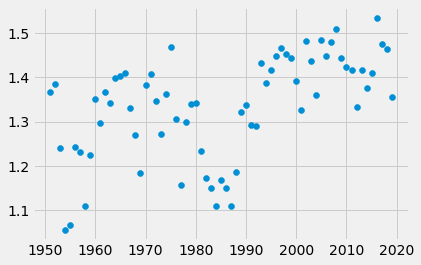

In [261]:
plt.scatter(x=k_means_results['year'], y=k_means_results['three'])

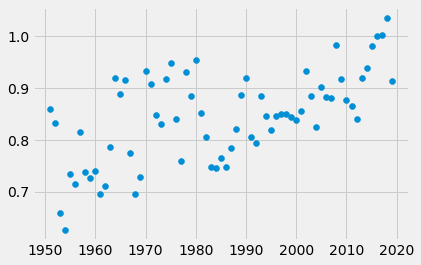

In [262]:
plt.scatter(x=k_means_results['year'], y=k_means_results['five'])

Nope. Cluster fit was scattered through the 70s, then hit a low point in the mid 80s, and has gradually increased in the time since.

### Clusters vs Positions

In [368]:
clusters = centroids.merge(player_clusters, left_on=['year', 'n_clusters', 'cluster'], right_on=['year', 'n_clusters', 'cluster'])
player_cluster_combo = clusters.merge(player_bios, left_on=['PLAYER_ID'], right_on=['PERSON_ID'])
player_cluster_combo.head()
#player_cluster_combo.dtypes

player_cluster_combo.groupby(['year', 'n_clusters', 'cluster'])['HEIGHT'].mean()


#player_bios.PERSON_ID.value_counts()

                #.merge(player_bios, left_on='player', right_on='DISPLAY_FIRST_LAST')
#temp = centroids.merge(player_clusters, on=['year', 'n_clusters', 'cluster']).merge(per_36_stats, on=['year', 'player'], suffixes=('_cluster', '_player'))


,year,n_clusters,cluster,n_players,PTS,REB,AST,PLAYER_ID,player,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,POSITION_INITIALS,AGE,AGE_DAYS
0,1951,1,0,51,12.7,7.3,3.3,76056,Paul Arizin,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111
1,1951,2,1,23,13.8,10.2,2.5,76056,Paul Arizin,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111
2,1951,3,1,23,13.8,10.2,2.5,76056,Paul Arizin,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111
3,1951,4,0,9,16.8,7.3,2.8,76056,Paul Arizin,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111
4,1951,5,1,10,16.7,10.4,2.6,76056,Paul Arizin,0,76056,Paul,Arizin,Paul Arizin,"Arizin, Paul",P. Arizin,paul-arizin,1928-04-09T00,Villanova,USA,Villanova\/USA,76.0,190.0,9,11,Forward,Inactive,1610612744,Warriors,PHW,warriors,Philadelphia,HISTADD_paul_arizin,1950,1961,N,Y,Y,1950,NaN,NaN,F,92,111


year  n_clusters  cluster
1951  1           0          76.196078
      2           0          74.000000
                  1          78.869565
      3           0          74.380952
                  1          78.869565
                               ...    
2019  10          5          77.040000
                  6          83.000000
                  7          76.416667
                  8          76.625000
                  9          76.700000
Name: HEIGHT, Length: 3795, dtype: float64

### Exploring year gaps

In [263]:
centroids[(centroids['n_clusters'] == 5) & centroids['year'].isin([1975, 1985, 2005, 2015])].sort_values(['year', 'AST'])

,year,n_clusters,cluster,n_players,PTS,REB,AST
1331,1975,5,1,22,16.5,9.1,2.0
1333,1975,5,3,9,10.7,11.9,3.4
1332,1975,5,2,23,15.0,4.4,3.7
1334,1975,5,4,8,22.7,11.0,3.8
1330,1975,5,0,20,18.7,3.7,5.5
1883,1985,5,3,33,18.4,9.9,2.2
1880,1985,5,0,8,9.5,8.7,2.3
1882,1985,5,2,21,24.0,5.4,3.5
1884,1985,5,4,20,17.7,4.5,4.0
1881,1985,5,1,25,15.4,3.7,8.0


### Cluster Player Representatives

In [265]:

temp = centroids.merge(player_clusters, on=['year', 'n_clusters', 'cluster']).merge(per_36_stats, on=['year', 'player'], suffixes=('_cluster', '_player'))

temp['difference'] = (temp.PTS_cluster - temp.PTS_player).abs() + (temp.REB_cluster - temp.REB_player).abs() + (temp.AST_cluster - temp.AST_player).abs()
temp = temp.sort_values('difference')
#temp.sort_values('year', 'n_clusters', 'AST_cluster', )
temp['ordering'] = temp['AST_cluster'] - temp['REB_cluster']
temp = temp.groupby(['year', 'n_clusters', 'cluster']).head(1).sort_values(['year', 'n_clusters', 'ordering'])

#temp = temp[(temp['n_clusters'] == 5) & (temp['year'] % 4 == 0)]
temp = temp[(temp['n_clusters'] == 3)]
temp


,year,n_clusters,cluster,n_players,PTS_cluster,REB_cluster,AST_cluster,player,GP,MIN,PTS_player,REB_player,AST_player,difference,ordering
292,1951,3,1,23,13.8,10.2,2.5,Don Barksdale,62,32.5,14.0,10.7,2.4,0.8,-7.7
352,1951,3,0,21,11.5,5.1,3.4,Don Boven,66,30.0,11.9,6.1,3.2,1.6,-1.7
422,1951,3,2,7,13.1,4.7,5.7,George King,66,28.6,12.6,5.3,4.7,2.1,1.0
1012,1952,3,2,15,15.6,9.9,2.6,Connie Simmons,65,26.3,15.3,9.6,2.7,0.7,-7.3
832,1952,3,0,16,10.1,8.4,2.4,Bob Lavoy,70,33.2,9.5,8.1,2.1,1.2,-6.0
892,1952,3,1,21,12.1,4.3,3.9,Jim Baechtold,64,29.6,12.5,4.1,2.9,1.6,-0.4
1142,1953,3,2,8,16.5,11.9,2.3,Dolph Schayes,72,36.9,16.7,11.8,2.9,0.9,-9.6
1332,1953,3,0,14,10.8,8.5,2.3,Earl Lloyd,72,30.6,10.7,8.6,1.9,0.6,-6.2
1262,1953,3,1,22,11.7,4.1,4.0,George King,72,32.9,12.4,4.0,4.2,1.0,-0.1
1732,1954,3,2,11,18.2,12.1,2.2,Larry Foust,70,32.3,18.9,11.1,1.9,2.0,-9.9
